In [1]:
# question 1
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

# URL of the S&P 500 Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Get the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the first table (which contains the current S&P 500 companies)
table = soup.find('table', {'class': 'wikitable'})

# Convert the table to a DataFrame
df = pd.read_html(str(table))[0]

# Clean up the column names
df.columns = [col.strip() for col in df.columns]

# Extract year from the 'Date added' column
df['Year Added'] = pd.to_datetime(df['Date added'], errors='coerce').dt.year

# Create a DataFrame with company information
companies_df = df[['Symbol', 'Security', 'Year Added']].copy()
companies_df.columns = ['Ticker', 'Company Name', 'Year Added']

# Calculate number of additions by year
additions_by_year = companies_df['Year Added'].value_counts().sort_index()

# Find the year with the highest number of additions (excluding 1957)
max_additions_year = additions_by_year[additions_by_year.index != 1957].idxmax()
max_additions_count = additions_by_year[max_additions_year]

print(f"Year with highest number of additions (excluding 1957): {max_additions_year}")
print(f"Number of additions in {max_additions_year}: {max_additions_count}")

# Display the first few rows of the companies DataFrame
print("\nFirst few companies in the dataset:")
print(companies_df.head())

# Display the additions by year
print("\nAdditions by year:")
print(additions_by_year)

Year with highest number of additions (excluding 1957): 2016
Number of additions in 2016: 23

First few companies in the dataset:
  Ticker         Company Name  Year Added
0    MMM                   3M        1957
1    AOS          A. O. Smith        2017
2    ABT  Abbott Laboratories        1957
3   ABBV               AbbVie        2012
4    ACN            Accenture        2011

Additions by year:
Year Added
1957    53
1964     1
1965     2
1969     2
1970     2
1972     2
1973     2
1974     1
1975     2
1976    11
1978     1
1979     2
1980     3
1981     3
1982     5
1983     3
1984     5
1985     7
1986     3
1987     2
1988     4
1989     5
1991     1
1992     3
1993     3
1994     7
1995     7
1996     2
1997    14
1998    11
1999     9
2000     9
2001     8
2002    13
2003     5
2004     6
2005     7
2006    10
2007    12
2008    17
2009    12
2010     9
2011    10
2012    14
2013    10
2014     8
2015    14
2016    23
2017    23
2018    14
2019    22
2020    12
2021    15
2022

[*********************100%***********************]  11 of 11 completed

YTD Performance of Major Stock Market Indices (Jan 1, 2025 - May 1, 2025)
       Country     Index  YTD Return (%)
        Mexico      ^MXX           13.05
     Hong Kong      ^HSI           12.72
        Brazil     ^BVSP           12.44
       Germany    ^GDAXI           12.35
United Kingdom     ^FTSE            2.84
         India     ^NSEI            2.49
         China 000001.SS            0.50
        Canada   ^GSPTSE           -0.23
     Australia     ^AXJO           -0.91
 United States     ^GSPC           -5.10
         Japan     ^N225           -8.30


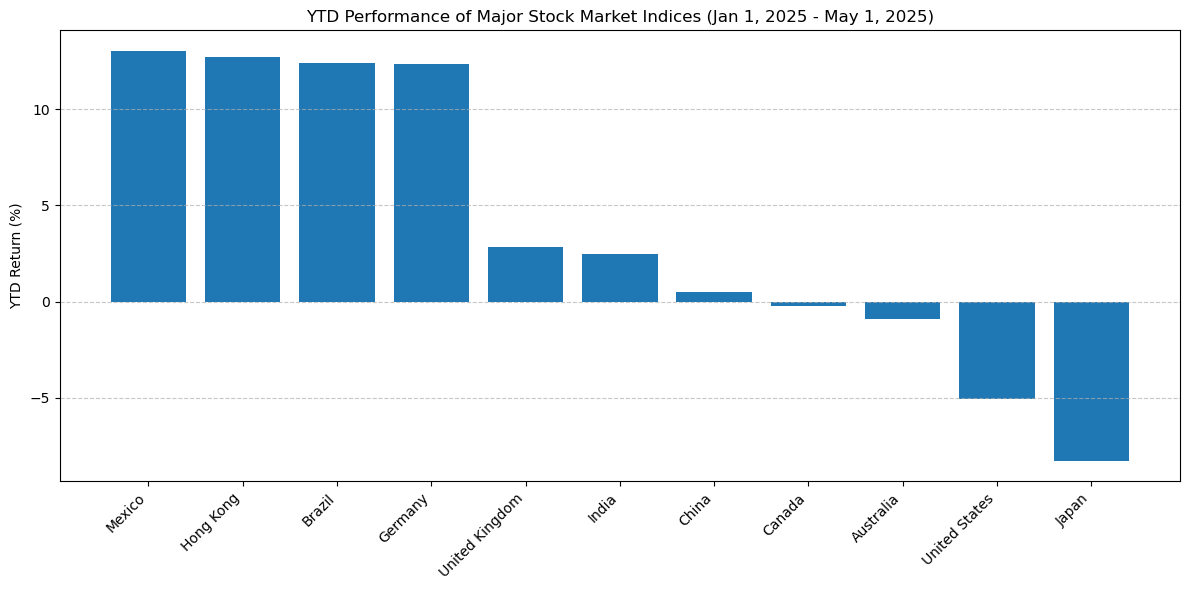

In [13]:
# question 2
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the indices and their symbols
indices = {
    'United States': '^GSPC',
    'China': '000001.SS',
    'Hong Kong': '^HSI',
    'Australia': '^AXJO',
    'India': '^NSEI',
    'Canada': '^GSPTSE',
    'Germany': '^GDAXI',
    'United Kingdom': '^FTSE',
    'Japan': '^N225',
    'Mexico': '^MXX',
    'Brazil': '^BVSP'
}

# Set the date range
start_date = '2025-01-01'
end_date = '2025-05-01'

# Fetch all index data at once
symbols = list(indices.values())
all_data = yf.download(symbols, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

# Prepare results list
results_list = []

for country, symbol in indices.items():
    try:
        # Some indices may have their data as a column MultiIndex, others as a single DataFrame
        if (symbol in all_data.columns.get_level_values(0)):
            close_prices = all_data[symbol]['Close']
        else:
            # fallback for single symbol download
           continue
        # Drop NaNs in case of missing data at start/end
        close_prices = close_prices.dropna()
        if close_prices.empty or len(close_prices) < 2:
            raise ValueError("Not enough data for YTD calculation")
        initial_price = close_prices.iloc[0]
        final_price = close_prices.iloc[-1]
        ytd_return = ((final_price - initial_price) / initial_price) * 100
        results_list.append({
            'Country': country,
            'Index': symbol,
            'YTD Return (%)': round(ytd_return, 2)
        })
    except Exception as e:
        print(f"Error fetching/calculating data for {country} ({symbol}): {str(e)}")

# Create DataFrame and sort
results = pd.DataFrame(results_list)
results = results.sort_values('YTD Return (%)', ascending=False)

# Display results
print("YTD Performance of Major Stock Market Indices (Jan 1, 2025 - May 1, 2025)")
print("=" * 80)
print(results.to_string(index=False))

# Create a bar chart of the results
plt.figure(figsize=(12, 6))
plt.bar(results['Country'], results['YTD Return (%)'])
plt.xticks(rotation=45, ha='right')
plt.title('YTD Performance of Major Stock Market Indices (Jan 1, 2025 - May 1, 2025)')
plt.ylabel('YTD Return (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [110]:
    high_dates.append(current_high_date)
    high_prices.append(all_time_highs['Close'].iloc[i].item())
    min_prices.append(min_price.values[0])
    min_dates.append(min_date.values)

In [119]:
print(sp500.columns)
sp500.columns = sp500.columns.droplevel(1)
sp500

MultiIndex([(         'Date',      ''),
            (        'Close', '^GSPC'),
            (         'High', '^GSPC'),
            (          'Low', '^GSPC'),
            (         'Open', '^GSPC'),
            (       'Volume', '^GSPC'),
            (  'AllTimeHigh',      ''),
            ('IsAllTimeHigh',      '')],
           names=['Price', 'Ticker'])


Price,Date,Close,High,Low,Open,Volume,AllTimeHigh,IsAllTimeHigh
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.660000,True
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.850000,True
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.930000,True
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.980000,True
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.080000,True
...,...,...,...,...,...,...,...,...
18959,2025-05-12,5844.189941,5845.370117,5786.080078,5807.200195,6014580000,6144.149902,False
18960,2025-05-13,5886.549805,5906.640137,5845.020020,5854.149902,5516290000,6144.149902,False
18961,2025-05-14,5892.580078,5906.549805,5872.109863,5896.740234,5233450000,6144.149902,False
18962,2025-05-15,5916.930176,5924.209961,5865.160156,5869.819824,4991290000,6144.149902,False


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

# Download S&P 500 historical data
sp500 = yf.download('^GSPC', start='1950-01-01', end=datetime.now().strftime('%Y-%m-%d')).reset_index()
# Calculate all-time highs
sp500['AllTimeHigh'] = sp500['Close'].cummax()
# sp500['IsAllTimeHigh']=sp500['Close'] == sp500['AllTimeHigh']

sp500['IsAllTimeHigh']=(sp500['Close'].to_numpy().ravel() == sp500['AllTimeHigh'].to_numpy().ravel())
print((sp500['IsAllTimeHigh'] == True).sum())


# Get all-time high dates
all_time_highs = sp500[sp500['IsAllTimeHigh']].copy()

# Initialize lists to store results
high_dates = []
high_prices = []
min_prices = []
min_dates = []

# Find minimum prices between consecutive all-time highs
for i in range(len(all_time_highs) - 1):
    current_high_date = all_time_highs.index[i]
    next_high_date = all_time_highs.index[i + 1]
    
    # Get the period between these two highs
    period_data = sp500.loc[current_high_date:next_high_date]
    
    # Find the minimum price in this period
    min_price = period_data['Close'].min()
    min_date = period_data['Close'].idxmin()
    
    # Store results
    high_dates.append(current_high_date.values)
    high_prices.append(all_time_highs['Close'].iloc[i].values)
    min_prices.append(min_price.values)
    min_dates.append(min_date.values)


# Create a DataFrame with the results
results = pd.DataFrame({
    'High Date': high_dates,
    'High Price': high_prices,
    'Min Price': min_prices,
    'Min Date': min_dates,
    
})


[*********************100%***********************]  1 of 1 completed


1474


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

# Download S&P 500 historical data
sp500 = yf.download('^GSPC', start='1950-01-01', end=datetime.now().strftime('%Y-%m-%d')).reset_index()
# Calculate all-time highs
sp500['AllTimeHigh'] = sp500['Close'].cummax()
# sp500['IsAllTimeHigh']=sp500['Close'] == sp500['AllTimeHigh']

sp500['IsAllTimeHigh']=(sp500['Close'].to_numpy().ravel() == sp500['AllTimeHigh'].to_numpy().ravel())
print((sp500['IsAllTimeHigh'] == True).sum())


# Get all-time high dates
all_time_highs = sp500[sp500['IsAllTimeHigh']].copy()

# Initialize lists to store results
high_dates = []
high_prices = []
min_prices = []
min_dates = []

# Find minimum prices between consecutive all-time highs
for i in range(len(all_time_highs) - 1):
    current_high_date = all_time_highs.index[i]
    next_high_date = all_time_highs.index[i + 1]
    
    # Get the period between these two highs
    period_data = sp500.loc[current_high_date:next_high_date]
    
    # Find the minimum price in this period
    min_price = period_data['Close'].min()
    min_date = period_data['Close'].idxmin()
    
    # Store results
    high_dates.append(current_high_date.values)
    high_prices.append(all_time_highs['Close'].iloc[i].values)
    min_prices.append(min_price.values)
    min_dates.append(min_date.values)


# Create a DataFrame with the results
results = pd.DataFrame({
    'High Date': high_dates,
    'High Price': high_prices,
    'Min Price': min_prices,
    'Min Date': min_dates,
    
})


[*********************100%***********************]  1 of 1 completed


1474


In [101]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

# Download S&P 500 historical data
sp500 = yf.download('^GSPC', start='1950-01-01', end=datetime.now().strftime('%Y-%m-%d')).reset_index()
# Calculate all-time highs
sp500['AllTimeHigh'] = sp500['Close'].cummax()
# sp500['IsAllTimeHigh']=sp500['Close'] == sp500['AllTimeHigh']

sp500['IsAllTimeHigh']=(sp500['Close'].to_numpy().ravel() == sp500['AllTimeHigh'].to_numpy().ravel())
print((sp500['IsAllTimeHigh'] == True).sum())


# Get all-time high dates
all_time_highs = sp500[sp500['IsAllTimeHigh']].copy()

# Initialize lists to store results
high_dates = []
high_prices = []
min_prices = []
min_dates = []

# Find minimum prices between consecutive all-time highs
for i in range(len(all_time_highs) - 1):
    current_high_date = all_time_highs.index[i]
    next_high_date = all_time_highs.index[i + 1]
    
    # Get the period between these two highs
    period_data = sp500.loc[current_high_date:next_high_date]
    
    # Find the minimum price in this period
    min_price = period_data['Close'].min()
    min_date = period_data['Close'].idxmin()
    
    # Store results
    high_dates.append(current_high_date.values)
    high_prices.append(all_time_highs['Close'].iloc[i].values)
    min_prices.append(min_price.values)
    min_dates.append(min_date.values)


# Create a DataFrame with the results
results = pd.DataFrame({
    'High Date': high_dates,
    'High Price': high_prices,
    'Min Price': min_prices,
    'Min Date': min_dates,
    
})


[*********************100%***********************]  1 of 1 completed


1474


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

# Download S&P 500 historical data
sp500 = yf.download('^GSPC', start='1950-01-01', end=datetime.now().strftime('%Y-%m-%d')).reset_index()
# Calculate all-time highs
sp500['AllTimeHigh'] = sp500['Close'].cummax()
# sp500['IsAllTimeHigh']=sp500['Close'] == sp500['AllTimeHigh']

sp500['IsAllTimeHigh']=(sp500['Close'].to_numpy().ravel() == sp500['AllTimeHigh'].to_numpy().ravel())
print((sp500['IsAllTimeHigh'] == True).sum())


# Get all-time high dates
all_time_highs = sp500[sp500['IsAllTimeHigh']].copy()

# Initialize lists to store results
high_dates = []
high_prices = []
min_prices = []
min_dates = []

# Find minimum prices between consecutive all-time highs
for i in range(len(all_time_highs) - 1):
    current_high_date = all_time_highs.index[i]
    next_high_date = all_time_highs.index[i + 1]
    
    # Get the period between these two highs
    period_data = sp500.loc[current_high_date:next_high_date]
    
    # Find the minimum price in this period
    min_price = period_data['Close'].min()
    min_date = period_data['Close'].idxmin()
    
    # Store results
    high_dates.append(current_high_date.values)
    high_prices.append(all_time_highs['Close'].iloc[i].values)
    min_prices.append(min_price.values)
    min_dates.append(min_date.values)


# Create a DataFrame with the results
results = pd.DataFrame({
    'High Date': high_dates,
    'High Price': high_prices,
    'Min Price': min_prices,
    'Min Date': min_dates,
    
})


[*********************100%***********************]  1 of 1 completed


1474


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

# Download S&P 500 historical data
sp500 = yf.download('^GSPC', start='1950-01-01', end=datetime.now().strftime('%Y-%m-%d')).reset_index()
# Calculate all-time highs
sp500['AllTimeHigh'] = sp500['Close'].cummax()
# sp500['IsAllTimeHigh']=sp500['Close'] == sp500['AllTimeHigh']

sp500['IsAllTimeHigh']=(sp500['Close'].to_numpy().ravel() == sp500['AllTimeHigh'].to_numpy().ravel())
print((sp500['IsAllTimeHigh'] == True).sum())


# Get all-time high dates
all_time_highs = sp500[sp500['IsAllTimeHigh']].copy()

# Initialize lists to store results
high_dates = []
high_prices = []
min_prices = []
min_dates = []

# Find minimum prices between consecutive all-time highs
for i in range(len(all_time_highs) - 1):
    current_high_date = all_time_highs.index[i]
    next_high_date = all_time_highs.index[i + 1]
    
    # Get the period between these two highs
    period_data = sp500.loc[current_high_date:next_high_date]
    
    # Find the minimum price in this period
    min_price = period_data['Close'].min()
    min_date = period_data['Close'].idxmin()
    
    # Store results
    high_dates.append(current_high_date.values)
    high_prices.append(all_time_highs['Close'].iloc[i].values)
    min_prices.append(min_price.values)
    min_dates.append(min_date.values)


# Create a DataFrame with the results
results = pd.DataFrame({
    'High Date': high_dates,
    'High Price': high_prices,
    'Min Price': min_prices,
    'Min Date': min_dates,
    
})


[*********************100%***********************]  1 of 1 completed


1474


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

# Download S&P 500 historical data
sp500 = yf.download('^GSPC', start='1950-01-01', end=datetime.now().strftime('%Y-%m-%d')).reset_index()
# Calculate all-time highs
sp500['AllTimeHigh'] = sp500['Close'].cummax()
# sp500['IsAllTimeHigh']=sp500['Close'] == sp500['AllTimeHigh']

sp500['IsAllTimeHigh']=(sp500['Close'].to_numpy().ravel() == sp500['AllTimeHigh'].to_numpy().ravel())
print((sp500['IsAllTimeHigh'] == True).sum())


# Get all-time high dates
all_time_highs = sp500[sp500['IsAllTimeHigh']].copy()

# Initialize lists to store results
high_dates = []
high_prices = []
min_prices = []
min_dates = []

# Find minimum prices between consecutive all-time highs
for i in range(len(all_time_highs) - 1):
    current_high_date = all_time_highs.index[i]
    next_high_date = all_time_highs.index[i + 1]
    
    # Get the period between these two highs
    period_data = sp500.loc[current_high_date:next_high_date]
    
    # Find the minimum price in this period
    min_price = period_data['Close'].min()
    min_date = period_data['Close'].idxmin()
    
    # Store results
    high_dates.append(current_high_date.values)
    high_prices.append(all_time_highs['Close'].iloc[i].values)
    min_prices.append(min_price.values)
    min_dates.append(min_date.values)


# Create a DataFrame with the results
results = pd.DataFrame({
    'High Date': high_dates,
    'High Price': high_prices,
    'Min Price': min_prices,
    'Min Date': min_dates,
    
})


[*********************100%***********************]  1 of 1 completed


1474


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

# Download S&P 500 historical data
sp500 = yf.download('^GSPC', start='1950-01-01', end=datetime.now().strftime('%Y-%m-%d')).reset_index()
# Calculate all-time highs
sp500['AllTimeHigh'] = sp500['Close'].cummax()
# sp500['IsAllTimeHigh']=sp500['Close'] == sp500['AllTimeHigh']

sp500['IsAllTimeHigh']=(sp500['Close'].to_numpy().ravel() == sp500['AllTimeHigh'].to_numpy().ravel())
print((sp500['IsAllTimeHigh'] == True).sum())


# Get all-time high dates
all_time_highs = sp500[sp500['IsAllTimeHigh']].copy()

# Initialize lists to store results
high_dates = []
high_prices = []
min_prices = []
min_dates = []

# Find minimum prices between consecutive all-time highs
for i in range(len(all_time_highs) - 1):
    current_high_date = all_time_highs.index[i]
    next_high_date = all_time_highs.index[i + 1]
    
    # Get the period between these two highs
    period_data = sp500.loc[current_high_date:next_high_date]
    
    # Find the minimum price in this period
    min_price = period_data['Close'].min()
    min_date = period_data['Close'].idxmin()
    
    # Store results
    high_dates.append(current_high_date.values)
    high_prices.append(all_time_highs['Close'].iloc[i].values)
    min_prices.append(min_price.values)
    min_dates.append(min_date.values)


# Create a DataFrame with the results
results = pd.DataFrame({
    'High Date': high_dates,
    'High Price': high_prices,
    'Min Price': min_prices,
    'Min Date': min_dates,
    
})


[*********************100%***********************]  1 of 1 completed


1474


In [103]:
high_prices

[Ticker
 ^GSPC    16.66
 Name: 0, dtype: float64,
 Ticker
 ^GSPC    16.85
 Name: 1, dtype: float64,
 Ticker
 ^GSPC    16.93
 Name: 2, dtype: float64,
 Ticker
 ^GSPC    16.98
 Name: 3, dtype: float64,
 Ticker
 ^GSPC    17.08
 Name: 4, dtype: float64,
 Ticker
 ^GSPC    17.09
 Name: 6, dtype: float64,
 Ticker
 ^GSPC    17.23
 Name: 22, dtype: float64,
 Ticker
 ^GSPC    17.290001
 Name: 23, dtype: float64,
 Ticker
 ^GSPC    17.32
 Name: 24, dtype: float64,
 Ticker
 ^GSPC    17.32
 Name: 42, dtype: float64,
 Ticker
 ^GSPC    17.450001
 Name: 49, dtype: float64,
 Ticker
 ^GSPC    17.49
 Name: 50, dtype: float64,
 Ticker
 ^GSPC    17.549999
 Name: 54, dtype: float64,
 Ticker
 ^GSPC    17.559999
 Name: 55, dtype: float64,
 Ticker
 ^GSPC    17.559999
 Name: 56, dtype: float64,
 Ticker
 ^GSPC    17.629999
 Name: 64, dtype: float64,
 Ticker
 ^GSPC    17.780001
 Name: 65, dtype: float64,
 Ticker
 ^GSPC    17.85
 Name: 66, dtype: float64,
 Ticker
 ^GSPC    17.940001
 Name: 68, dtype: float64,
 Tick

In [93]:
results = pd.DataFrame({
    'High Date': high_dates,
    'High Price': high_prices,
    'Min Price': min_prices,
    'Min Date': min_dates,
   
})
results['Drawdown %'] = (results['High Price'] - results['Min Price']) / results['High Price'] * 100


In [94]:
results.head()

,High Date,High Price,Min Price,Min Date,Drawdown %
0,1950-01-03,Ticker ^GSPC 16.66 Name: 1950-01-03 00:00:0...,Ticker ^GSPC 16.66 dtype: float64,Ticker ^GSPC 1950-01-03 dtype: datetime64[ns],Ticker ^GSPC 0.0 dtype: float64
1,1950-01-04,Ticker ^GSPC 16.85 Name: 1950-01-04 00:00:0...,Ticker ^GSPC 16.85 dtype: float64,Ticker ^GSPC 1950-01-04 dtype: datetime64[ns],Ticker ^GSPC 0.0 dtype: float64
2,1950-01-05,Ticker ^GSPC 16.93 Name: 1950-01-05 00:00:0...,Ticker ^GSPC 16.93 dtype: float64,Ticker ^GSPC 1950-01-05 dtype: datetime64[ns],Ticker ^GSPC 0.0 dtype: float64
3,1950-01-06,Ticker ^GSPC 16.98 Name: 1950-01-06 00:00:0...,Ticker ^GSPC 16.98 dtype: float64,Ticker ^GSPC 1950-01-06 dtype: datetime64[ns],Ticker ^GSPC 0.0 dtype: float64
4,1950-01-09,Ticker ^GSPC 17.08 Name: 1950-01-09 00:00:0...,Ticker ^GSPC 17.030001 dtype: float64,Ticker ^GSPC 1950-01-10 dtype: datetime64[ns],Ticker ^GSPC 0.292736 dtype: float64


In [85]:
(np.array(high_prices) - np.array(min_prices))/ np.array(high_prices)

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.0432214 ],
       [0.02028861],
       [0.        ]])

In [ ]:

# Print summary statistics
print("\nSummary of S&P 500 All-Time Highs and Subsequent Minimums:")
print(f"Total number of all-time highs: {len(results)}")
print(f"\nAverage drawdown between highs: {results['Drawdown %'].mean():.2f}%")
print(f"Maximum drawdown: {results['Drawdown %'].max():.2f}%")
print(f"Minimum drawdown: {results['Drawdown %'].min():.2f}%")

# Save results to CSV
results.to_csv('sp500_highs_and_mins.csv')
print("\nResults have been saved to 'sp500_highs_and_mins.csv'")